In [2]:
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd

import yaml
import seaborn as sns
# import spacY
import matplotlib.pyplot as plt
from transformers import AutoTokenizer


In [3]:
dataset = load_dataset("JuDDGES/pl-court-instruct")

Using the latest cached version of the dataset since JuDDGES/pl-court-instruct couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/albert/.cache/huggingface/datasets/JuDDGES___pl-court-instruct/default/0.0.0/f735e3937fb0e33f0f0c58ffced0cee8aa3ecbcf (last modified on Wed Apr 17 17:46:24 2024).


In [4]:
train = dataset["train"]
train = train.select(range(10_000))  # REMOVE THIS BEFORE FINAL EXEC"

# Stats

## train/test

In [5]:
df = pd.DataFrame([{"subset":k, "#": len(v)} for k, v in dataset.items()])
df["%"] = df["#"] / df["#"].sum() * 100
df

,subset,#,%
0,train,285879,99.305264
1,test,2000,0.694736


## Columns

In [6]:
dataset.column_names

{'train': ['prompt', 'context', 'output'],
 'test': ['prompt', 'context', 'output']}

## Words

In [7]:
df = train.to_pandas()

In [8]:
df.sample(10_000)

,prompt,context,output
3560,\nYou are extracting information from the cour...,Sygn. akt II Ka 753/16\n\nWYROK\nW IMIENIU RZE...,"```yaml\ndate: '2017-01-31'\njudges:\n- ""Gra\u..."
5555,\nYou are extracting information from the cour...,Sygn. akt: I C 630/18\n\nWYROK\nW IMIENIU RZEC...,"```yaml\ndate: '2020-12-01'\njudges:\n- ""S\u01..."
8866,\nYou are extracting information from the cour...,Sygn. akt IV Ka 886/21\n\n1.\n\n2.WYROK\n\n2.1...,"```yaml\ndate: '2022-02-10'\njudges:\n- ""SSO A..."
7014,\nYou are extracting information from the cour...,Sygn. akt I Ca 64/17\n\nPOSTANOWIENIE\nDnia 27...,"```yaml\ndate: '2017-04-27'\njudges:\n- ""W\u01..."
4704,\nYou are extracting information from the cour...,Sygn. akt II K 46/12\n\nWYROK ZAOCZNY\nW IMIEN...,"```yaml\ndate: '2012-03-27'\njudges:\n- ""S\u01..."
...,...,...,...
9165,\nYou are extracting information from the cour...,Sygn. akt II C 588/16\n\nWYROK\nW IMIENIU RZEC...,```yaml\ndate: '2017-02-20'\njudges:\n- Katarz...
5733,\nYou are extracting information from the cour...,Sygn. akt I Co 1668/19\n\nPOSTANOWIENIE\nDnia ...,"```yaml\ndate: '2020-03-17'\njudges:\n- ""aseso..."
6976,\nYou are extracting information from the cour...,Sygn. akt IV RC 641/17\n\nWYROK\nW IMIENIU RZE...,"```yaml\ndate: '2017-12-19'\njudges:\n- ""Katar..."
6537,\nYou are extracting information from the cour...,Sygn. akt IV U 739/16\n\nWYROK\nW IMIENIU RZEC...,"```yaml\ndate: '2017-07-06'\njudges:\n- ""Jerzy..."


In [9]:
for col in ["prompt", "context", "output"]:
    df[f"{col}_words"] = df[col].apply(lambda x: len(x.split()))

prompt


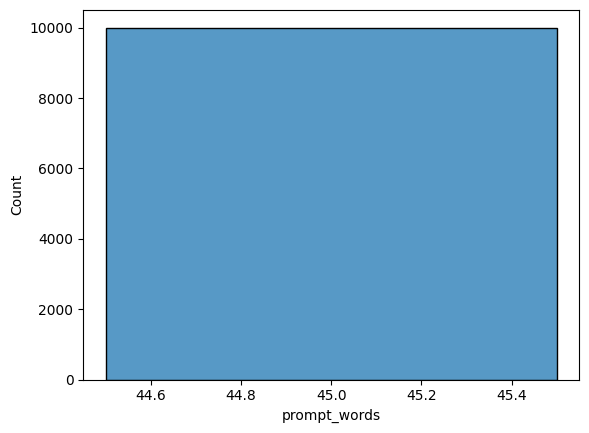

context


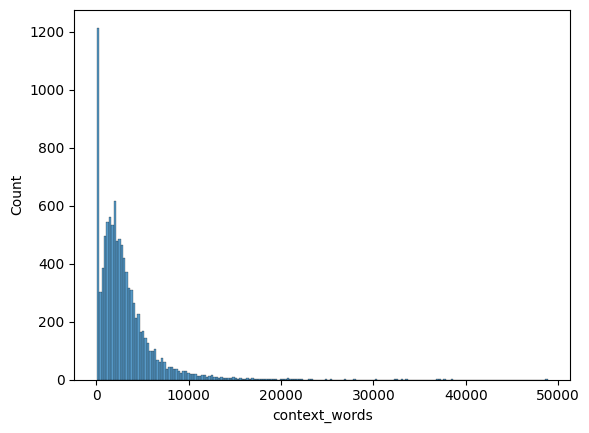

output


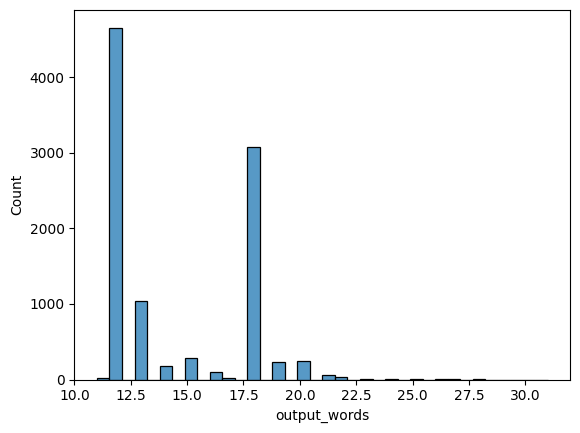

In [10]:
for col in ["prompt", "context", "output"]:
    print(col)
    sns.histplot(df, x=f"{col}_words")
    plt.show()

## Tokens

In [11]:
tokenizer_llama = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

prompt


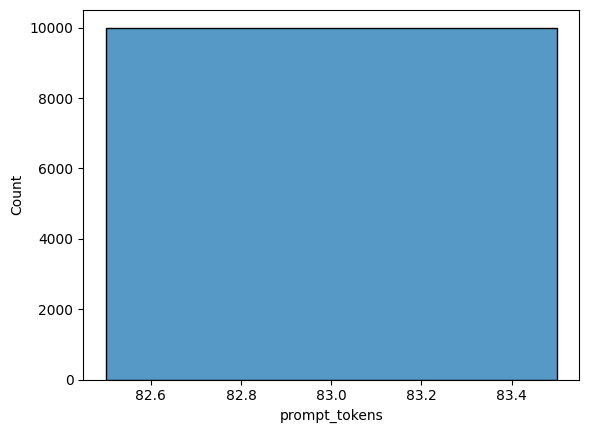

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

context


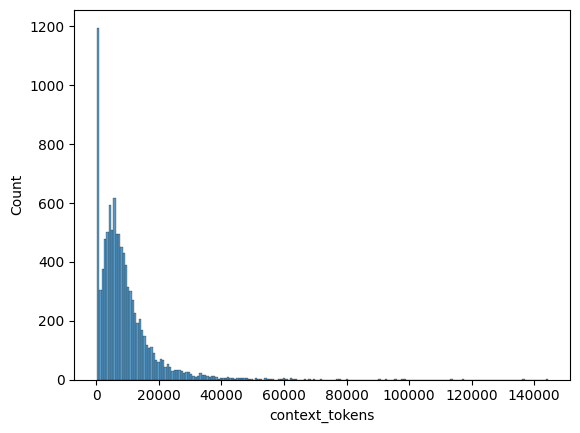

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

output


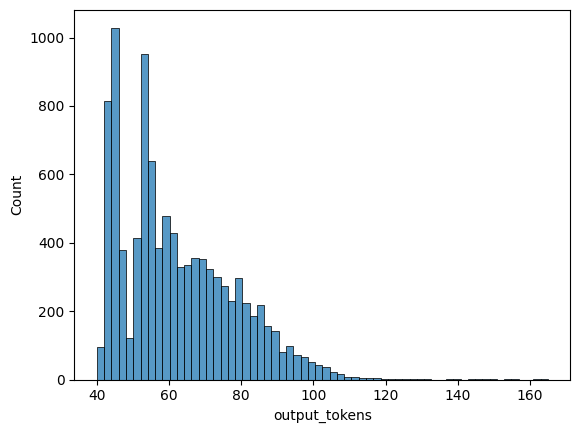

In [16]:
for col in ["prompt", "context", "output"]:
    def tokenization(examples):
        return {
            "num_tokens_llama": tokenizer_llama(
                examples[col],
                return_length=True,
                return_attention_mask=False,
                padding=False,
                truncation=False,
            )["length"]
        }
    
    
    train = train.map(tokenization, batched=True, num_proc=1)
    df[f"{col}_tokens"] = train['num_tokens_llama']
    print(col)
    sns.histplot(df, x=f"{col}_tokens")
    plt.show()

In [22]:
df[["prompt_words", "context_words", "output_words", "prompt_tokens", "context_tokens", "output_tokens"]].describe()

,prompt_words,context_words,output_words,prompt_tokens,context_tokens,output_tokens
count,10000.0,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,45.0,3000.280000,14.631700,83.0,8807.601300,62.646600
std,0.0,3023.287323,3.029286,0.0,8858.296519,15.811613
min,45.0,55.000000,11.000000,83.0,185.000000,40.000000
25%,45.0,1135.000000,12.000000,83.0,3393.750000,51.000000
50%,45.0,2291.500000,13.000000,83.0,6767.000000,59.000000
75%,45.0,3910.250000,18.000000,83.0,11421.000000,73.000000
max,45.0,48889.000000,31.000000,83.0,144388.000000,165.000000


## Output

In [48]:
parsed_output = df.output.apply(lambda x: yaml.safe_load(x.replace("```yaml", "").replace("```", "")))

In [49]:
out_df = pd.DataFrame.from_dict(parsed_output.tolist())
out_df.date = pd.to_datetime(out_df.date)

In [50]:
out_df.date.describe()

count                         10000
mean     2017-04-20 19:16:53.760000
min             2000-05-25 00:00:00
25%             2015-01-15 00:00:00
50%             2016-12-20 00:00:00
75%             2019-03-15 00:00:00
max             2024-02-20 00:00:00
Name: date, dtype: object

In [52]:
out_df.judges.apply(len).describe()

count    10000.000000
mean         1.758600
std          0.964064
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          5.000000
Name: judges, dtype: float64